<a href="https://colab.research.google.com/github/GilangPutra14/tubes_PCVK/blob/main/tubes_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt



(<matplotlib.axes._subplots.AxesSubplot at 0x7f1a2c7036d0>,
 <matplotlib.image.AxesImage at 0x7f1a2c58f790>)

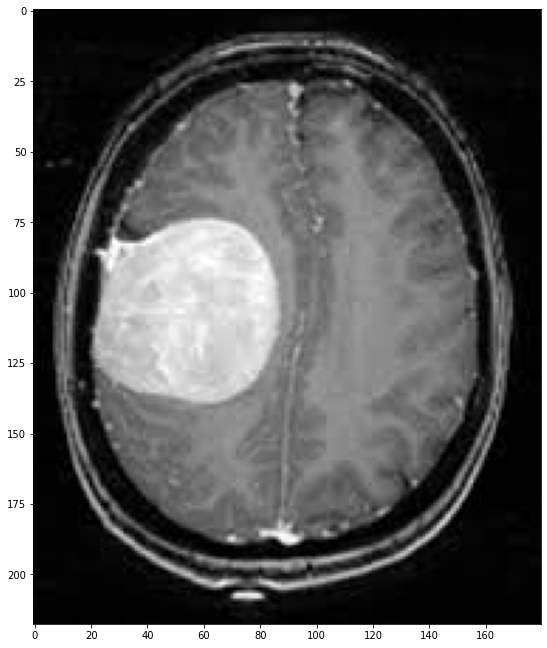

In [12]:
filename = ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y1.jpg')

img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))

pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)


# masih Menngunakan 3 cluster
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)


#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)

plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)


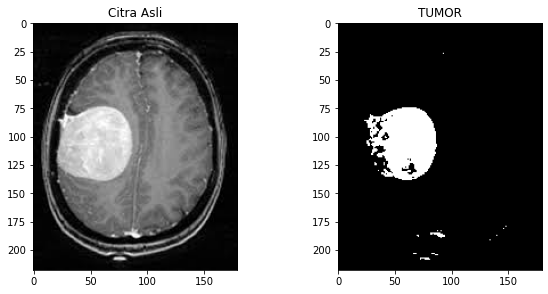

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y1.jpg')

img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,tumor = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(tumor, 'gray') 
plt.title('TUMOR') 
color = ('r','g','b') 

plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1a208f4dd0>,
 <matplotlib.image.AxesImage at 0x7f1a20847c10>)

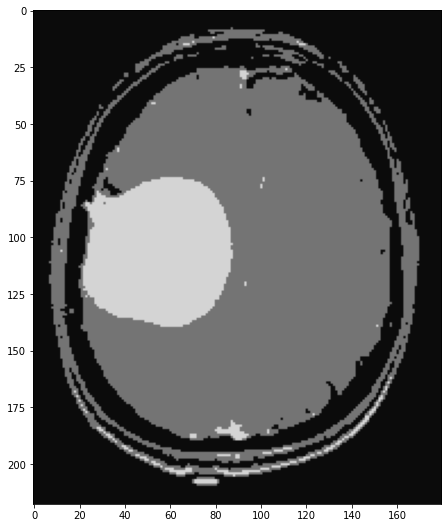

In [40]:
filename = ('/content/drive/MyDrive/Brain_Tumor/BrainTumor/Y1.jpg')

img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

pixel_values = img.reshape((-10, 3))

pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)


# masih Menngunakan 3 cluster
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)



#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)



plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(2,2,3),plt.imshow(segmented_image)



(<matplotlib.axes._subplots.AxesSubplot at 0x7f1a2062a490>,
 <matplotlib.image.AxesImage at 0x7f1a205b1e50>)

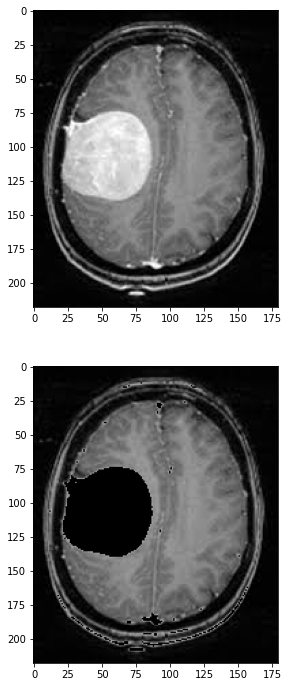

In [42]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)

plt.subplot(2,2,3),plt.imshow(masked_image)